In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('./core/Batting.csv')

In [4]:
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
df.shape

(105861, 22)

In [6]:
df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105861.000000,105105.000000,103493.000000,82320.000000,105861.000000,103761.000000,69210.000000,103044.000000,99792.000000,69757.000000,80420.0000
mean,1965.775290,1.078773,51.214338,140.960694,18.694212,36.861583,6.266321,1.271875,2.843209,16.968432,2.970771,1.205576,12.990431,20.577057,1.086086,1.060809,2.252535,1.043594,2.9404
std,39.319486,0.286613,47.057599,184.433173,28.180404,52.471260,9.666868,2.621256,6.354058,26.342342,7.687529,2.717156,20.706939,28.345666,2.750420,2.290011,4.198339,1.950372,4.7085
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,1935.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,1975.000000,1.000000,34.000000,48.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,2000.000000,1.000000,80.000000,229.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.0000
max,2018.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.0000


In [7]:
df.dtypes

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
dtype: object

In [8]:
df.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          738
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           756
SB           2368
CS          23541
BB              0
SO           2100
IBB         36651
HBP          2817
SH           6069
SF          36104
GIDP        25441
dtype: int64

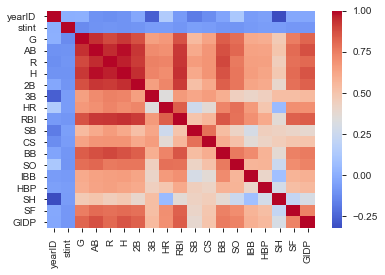

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [10]:
df._get_numeric_data().head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1871,1,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,1871,1,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,1871,1,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,1871,1,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,1871,1,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [11]:
pp.ProfileReport(df)

In [12]:
hr_by_yr = df.groupby(by=['playerID', 'yearID'])[['G', 'SO', 'BB', 'HR', 'RBI']].sum()

In [13]:
hr_by_yr.head()

G   SO  BB  HR  RBI
playerID  yearID                      
aardsda01 2004    11  0.0   0   0  0.0
          2006    45  0.0   0   0  0.0
          2007    25  0.0   0   0  0.0
          2008    47  1.0   0   0  0.0
          2009    73  0.0   0   0  0.0

In [14]:
hr_by_yr.loc[hr_by_yr['HR'] > 50]

,,G,SO,BB,HR,RBI
playerID,yearID,,,,,
bautijo02,2010,161,116.0,100,54,124.0
bondsba01,2001,153,93.0,177,73,137.0
davisch02,2013,160,199.0,72,53,138.0
fieldce01,1990,159,182.0,90,51,132.0
fostege01,1977,158,107.0,61,52,149.0
foxxji01,1932,154,96.0,116,58,169.0
gonzalu01,2001,162,83.0,100,57,142.0
greenha01,1938,155,92.0,119,58,146.0
griffke02,1997,157,121.0,76,56,147.0


In [15]:
import matplotlib.pyplot as plt

In [16]:
hr_by_yr.dtypes

G        int64
SO     float64
BB       int64
HR       int64
RBI    float64
dtype: object

In [17]:
hr_by_yr.reset_index(inplace=True)

In [18]:
hr_by_yr.set_index('yearID', inplace=True)

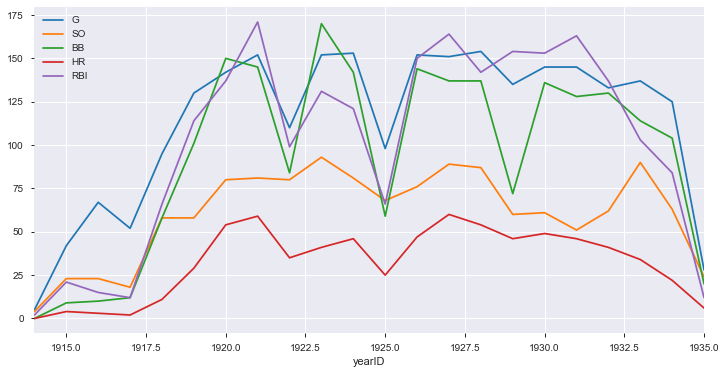

In [19]:
hr_by_yr[hr_by_yr['playerID'] == 'ruthba01'].plot(figsize=(12,6));

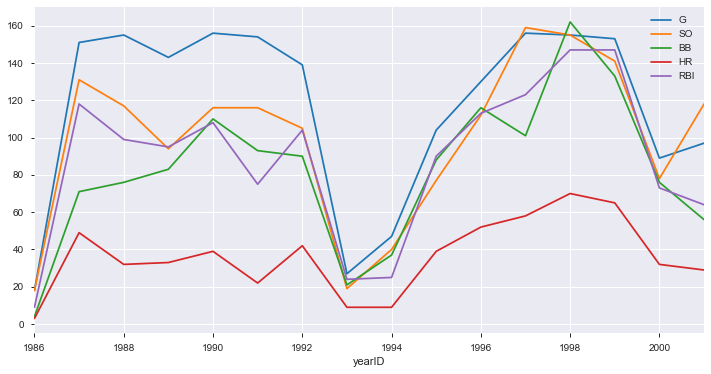

In [20]:
hr_by_yr[hr_by_yr['playerID'] == 'mcgwima01'].plot(figsize=(12,6));

In [21]:
team_by_yr = df.groupby(by=['teamID', 'yearID'])[['G', 'SO', 'BB', 'HR', 'RBI']].sum()

In [22]:
team_by_yr.reset_index(inplace=True)

In [23]:
team_by_yr.set_index('yearID', inplace=True)

In [24]:
for i in team_by_yr['teamID'].values:
    print(i)

ALT
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ANA
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ARI
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
ATL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BAL
BFN
BFN
BFN
BFN
BFN
BFN
BFN
BFP
BL1
BL1
BL1
BL2
BL2
BL2
BL2
BL2
BL2
BL2
BL2
BL3
BL3
BL4
BLA
BLA
BLF
BLF
BLN
BLN
BLN
BLN
BLN
BLN
BLN
BLN
BLU
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS
BOS


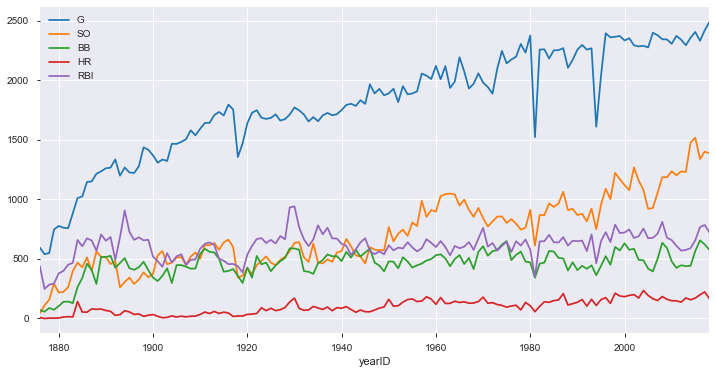

In [25]:
team_by_yr[team_by_yr['teamID'] == 'CHN'].plot(figsize=(12,6));

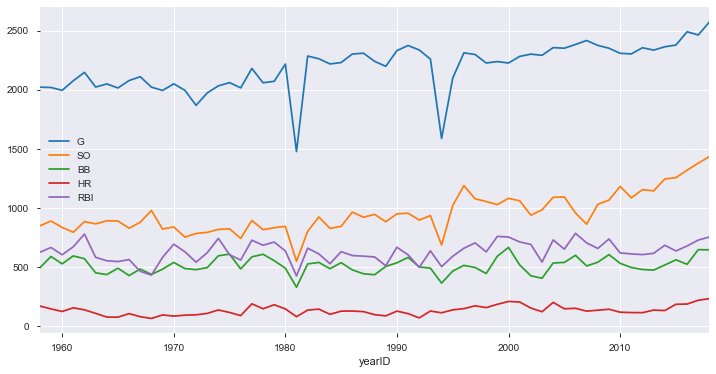

In [26]:
team_by_yr[team_by_yr['teamID'] == 'LAN'].plot(figsize=(12,6));

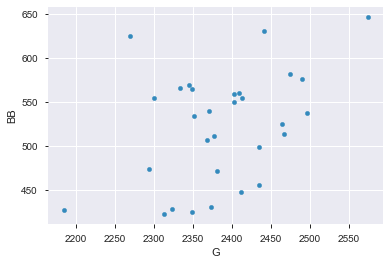

In [39]:
team_by_yr.loc[2018].plot(x='G', y='BB', kind='scatter')